In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np


In [7]:
root = Path(
    "/Users/hagayuya/Library/CloudStorage/GoogleDrive-haga.yuya2.2016@gmail.com/マイドライブ/Camera from Japan"
)
path = root / "colorChecker.nh7"

In [ ]:
# uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands '>u2' numpy.uint16
with path.open("rb") as fopen:
    raw_image = np.fromfile(fopen, dtype=np.uint16)


In [23]:
# Calculate number of bands from size of image
samples = 1280
lines = 1024

size_of_image = raw_image.shape[0]
bands = size_of_image // (samples * lines)

# Reshape the image to 3D array by bands, lines, samples
spectral_image = np.reshape(raw_image, (lines, bands, samples))

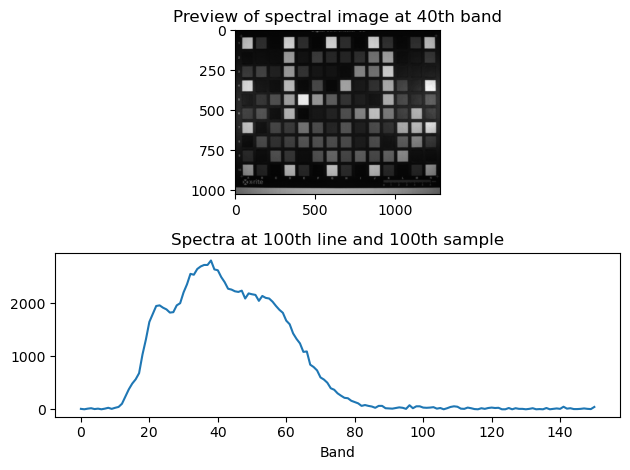

In [35]:
fig, axes = plt.subplots(2, 1, tight_layout=True)
axes[0].imshow(spectral_image[:, 40, :], cmap="gray")
axes[0].set_title("Preview of spectral image at 40th band")

axes[1].plot(spectral_image[100, :, 100])
axes[1].set_title("Spectra at 100th line and 100th sample")
axes[1].set_xlabel("Band")
plt.show()